In [1]:
import tensorflow as tf
import numpy as np

from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

from statistics import mode

import pandas as pd
import matplotlib.pyplot as plt

import os
import joblib
from joblib import Parallel, delayed

# 1. MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
n_train = len(x_train)
n_test = len(x_test)
X_train = x_train.reshape((n_train, -1))
X_test = x_test.reshape((n_test, -1))

In [4]:
for _ in np.unique(y_train):
    print(sum(_==y_train))

5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


In [5]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = dt.predict(X_test)
np.mean(y_pred==y_test)

0.8749

In [7]:
dt.get_depth()

50

In [127]:
if not os.path.exists('ds1_tree_depth_cv.joblib'):
    param_grid = {
        'max_depth': np.arange(1, 30, 1) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=200, 
        random_state=42, 
        criterion='entropy',
        max_features='sqrt',
        n_jobs=6
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds1_tree_depth_cv.joblib')

else:
    grid_search = joblib.load('ds1_tree_depth_cv.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [128]:
cv_results[['param_max_depth', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_depth,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.527233,0.019246,0.536667,0.537000,0.485667,0.522500,0.522667,0.523833,0.528167,0.525667,0.521667,0.568500
1,2,0.632083,0.016384,0.634833,0.643333,0.616000,0.636000,0.618833,0.622667,0.616000,0.627167,0.632333,0.673667
2,3,0.732333,0.017449,0.735667,0.741167,0.706833,0.728833,0.726500,0.728667,0.720167,0.727667,0.730000,0.777833
3,4,0.804567,0.016560,0.806333,0.812167,0.781333,0.807500,0.793833,0.794667,0.799500,0.801500,0.801000,0.847833
4,5,0.853967,0.014012,0.861000,0.854667,0.838333,0.856167,0.843333,0.848500,0.849000,0.849167,0.847667,0.891833


In [129]:
tree_depths = cv_results['param_max_depth'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

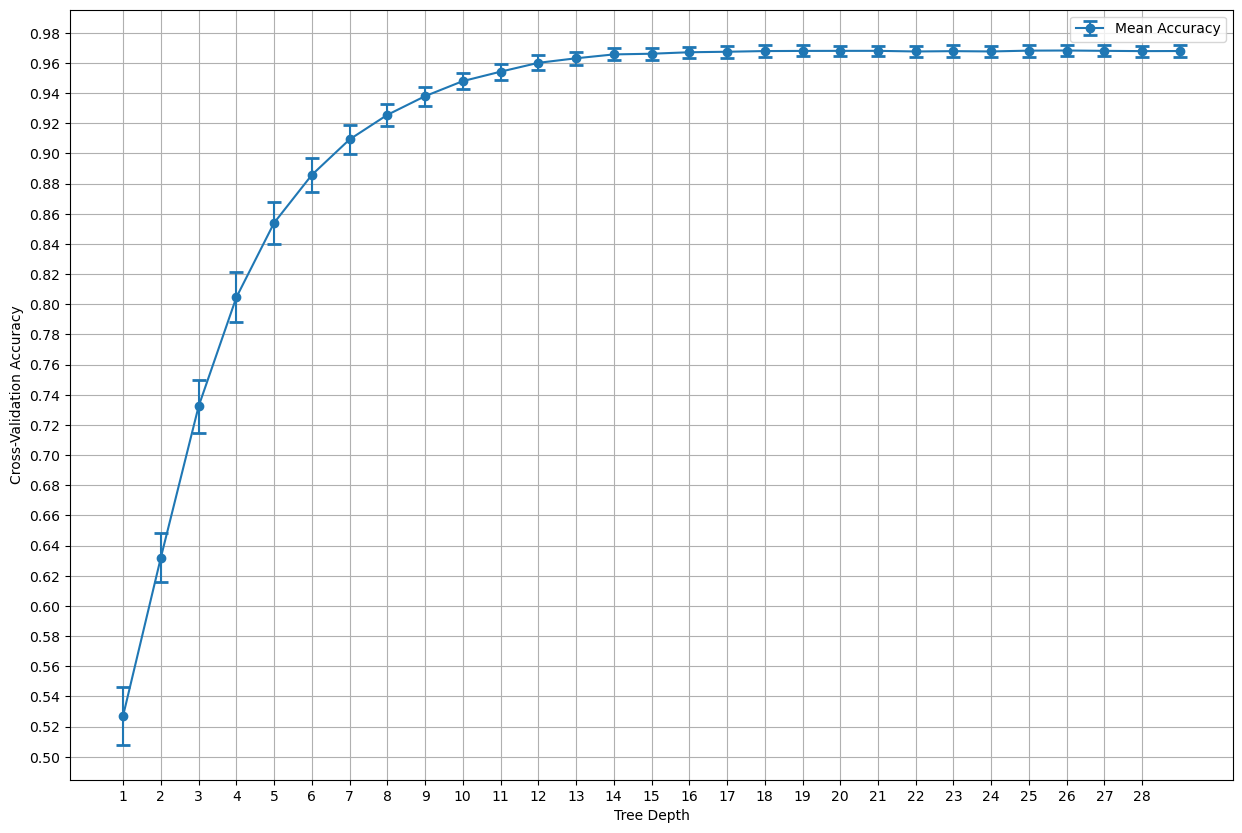

In [130]:
plt.figure(figsize=(15, 10))
plt.errorbar(tree_depths, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation Accuracy')
#plt.title('Cross-Validation Accuracy against Tree Depth')
plt.xticks(tree_depths[:-1])
plt.yticks(np.arange(0.5, 1.0, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('depth1.png', dpi=200)
plt.show()

In [12]:
?plt.savefig

Signature: plt.savefig(*args, **kwargs) -> 'None'
Docstring:
Save the current figure.

Call signature::

  savefig(fname, *, transparent=None, dpi='figure', format=None,
          metadata=None, bbox_inches=None, pad_inches=0.1,
          facecolor='auto', edgecolor='auto', backend=None,
          **kwargs
         )

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or binary file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and *fname* has

In [79]:
# Relationship between decision tree depth and number of decision tree
# if not os.path.exists('ds1_depthnum_cv.joblib'):

#     kf = KFold(n_splits=10, shuffle=True, random_state=42)

#     param_grid = {
#         'max_depth': np.arange(1, 22, 2),
#     }

#     accuracy_scores =  np.zeros((len(param_grid['max_depth']), 1000))

#     for j, max_depth in enumerate(param_grid['max_depth']):

#         print('Processing max depth', max_depth)

#         for train_index, test_index in kf.split(X_train):

#             Xtrain, Xtest = X_train[train_index], X_train[test_index]
#             ytrain, ytest = y_train[train_index], y_train[test_index]

#             rf = RandomForestClassifier(
#                 random_state=42, 
#                 criterion='entropy',
#                 max_features='sqrt',
#                 n_jobs=6,
#                 max_depth=max_depth,
#                 n_estimators = 1000
#             )
#             rf.fit(Xtrain, ytrain)

#             predictions = np.zeros((len(ytest), 10))
#             for i, estimator in enumerate(rf.estimators_):

#                 tree_pred = estimator.predict(Xtest)
#                 for l, pred in enumerate(tree_pred):
#                     predictions[l, int(pred)] += 1
                    
#                 ypred = np.argmax(predictions, axis=1)
#                 accuracy_scores[j, i] += accuracy_score(ytest, ypred)

#     accuracy_scores /= kf.get_n_splits()
#     joblib.dump(accuracy_scores, 'ds1_depthnum_cv.joblib')

# else:
#     accuracy_scores = joblib.load('ds1_depthnum_cv.joblib')

In [131]:
def run_fold(max_depth, train_index, test_index, X_train, y_train, fold_idx):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    rf = RandomForestClassifier(
        random_state=42,
        criterion='entropy',
        max_features='sqrt',
        max_depth=max_depth,
        n_estimators=1000,
        warm_start=False
    )
    rf.fit(Xtrain, ytrain)
    predictions = np.zeros((len(ytest), 10))

    accuracy_scores_fold = np.zeros(1000)
    for i, estimator in enumerate(rf.estimators_):

        tree_pred = estimator.predict(Xtest)
        for idx, pred in enumerate(tree_pred):
            predictions[idx, int(pred)] += 1

        ypred = np.argmax(predictions, axis=1)
        accuracy_scores_fold[i] = accuracy_score(ytest, ypred)
    
    return accuracy_scores_fold

if not os.path.exists('ds1_depthnum_cv_parallel.joblib'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    param_grid = {
        'max_depth': np.arange(1, 22, 2),
    }

    accuracy_scores = np.zeros((len(param_grid['max_depth']), 1000))

    for j, max_depth in enumerate(param_grid['max_depth']):

        print('Processing max depth', max_depth)

        results = Parallel(n_jobs=6)(
            delayed(run_fold)(max_depth, train_index, test_index, X_train, y_train, fold_idx)
            for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train))
        )

        for fold_result in results:
            accuracy_scores[j, :] += fold_result

    accuracy_scores /= kf.get_n_splits()
    joblib.dump(accuracy_scores, 'ds1_depthnum_cv_parallel.joblib')

else:
    accuracy_scores = joblib.load('ds1_depthnum_cv_parallel.joblib')

In [132]:
param_grid = {
        'max_depth': np.arange(1, 22, 2),
}

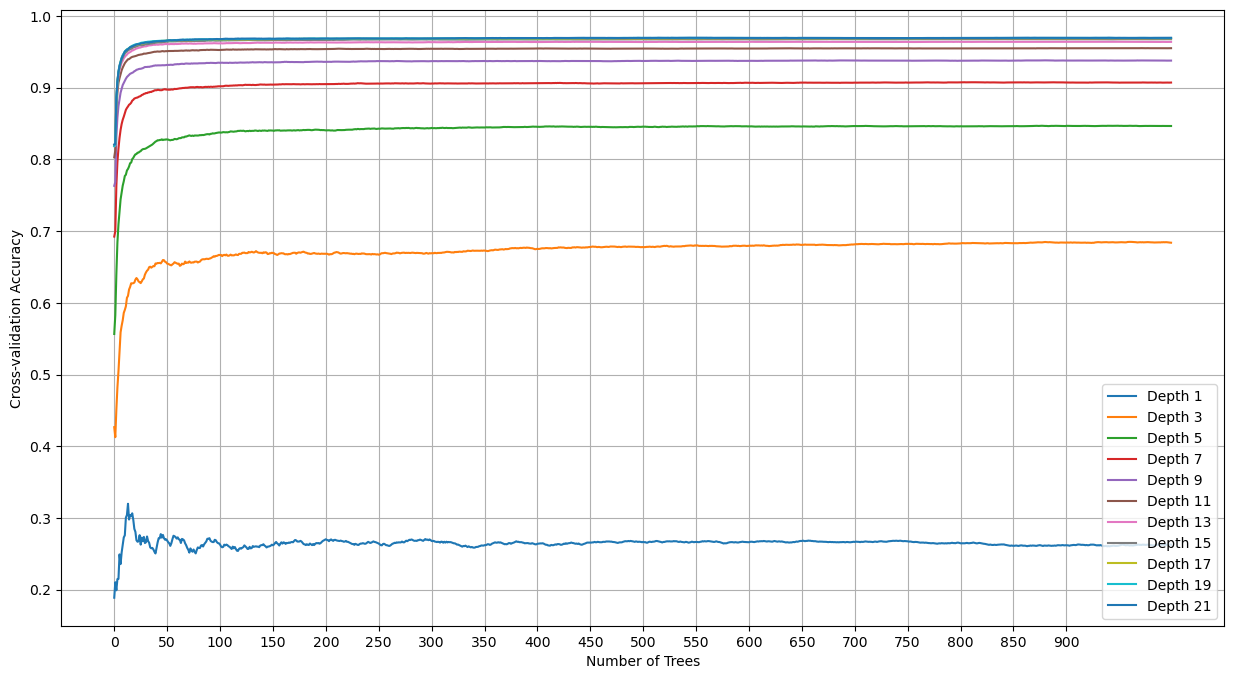

In [133]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][i]}')
    plt.xticks(np.arange(0, 950, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid()
plt.savefig('depth_iterations_1a.png', dpi=200)
plt.show()

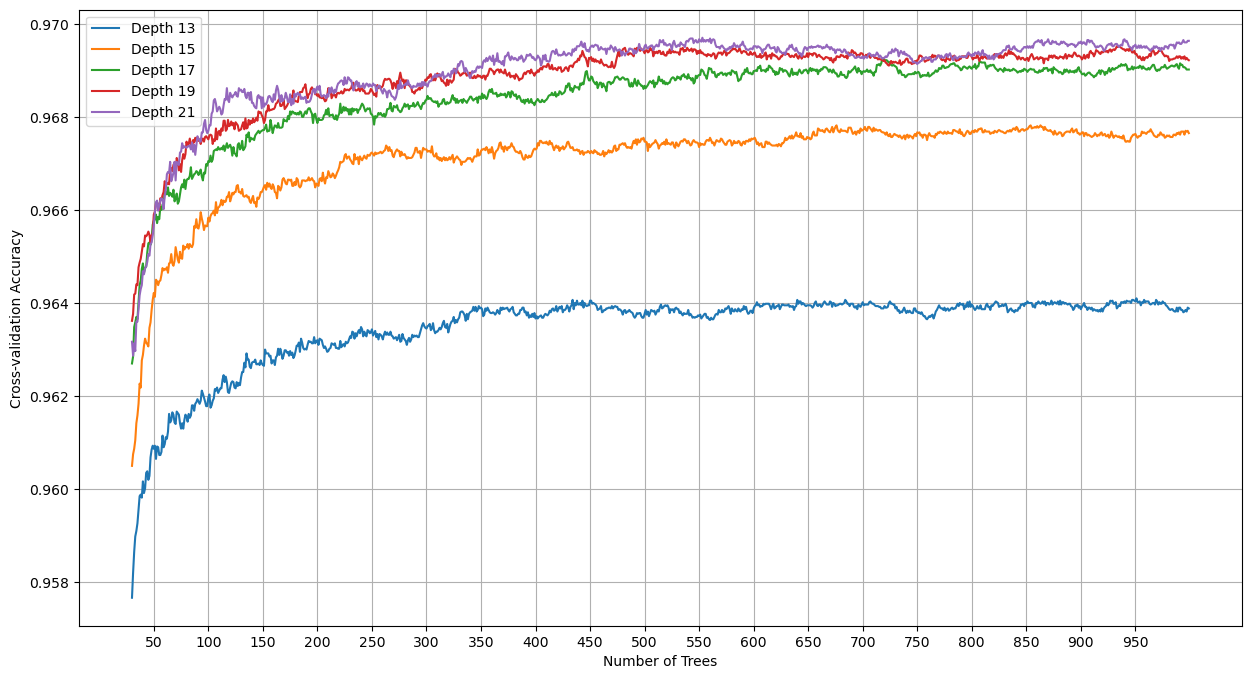

In [134]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores[-5:, 30:]):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][-5:][i]}')
    plt.xticks(np.arange(20, 970, 50), np.arange(50, 1000, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.grid()
plt.savefig('depth_iterations_1b.png', dpi=200)
plt.show()

We see that the accuracy does not increase for each tree depth after $500$ iterations. We also see that the deeper each tree the better the performance, 
hence we thus use $500$ trees for the sake of computational efficiency and we use tree depth $21$. Now we tune the number the random number of variables at each split.

In [135]:
if not os.path.exists('ds1_max_features.joblib'):
    param_grid = {
        'max_features': np.arange(1, 40, 1) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=500, 
        random_state=42, 
        criterion='entropy',
        n_jobs=-1,
        max_depth=None
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds1_max_features.joblib')

else:
    grid_search = joblib.load('ds1_max_features.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [136]:
cv_results[['param_max_features', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_features,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.960517,0.004702,0.964000,0.956333,0.958500,0.964833,0.957667,0.959333,0.957500,0.957333,0.957667,0.972000
1,2,0.961883,0.004351,0.966333,0.958167,0.958667,0.965000,0.958333,0.960333,0.962833,0.958667,0.958667,0.971833
2,3,0.963250,0.004618,0.968833,0.959167,0.961833,0.966000,0.959000,0.962333,0.962833,0.958167,0.960833,0.973500
3,4,0.963967,0.003921,0.968333,0.962167,0.962000,0.964833,0.960500,0.963333,0.963167,0.960833,0.960833,0.973667
4,5,0.964983,0.004235,0.970167,0.962500,0.963833,0.965500,0.961167,0.963833,0.963833,0.960333,0.963500,0.975167


In [137]:
max_features = cv_results['param_max_features'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

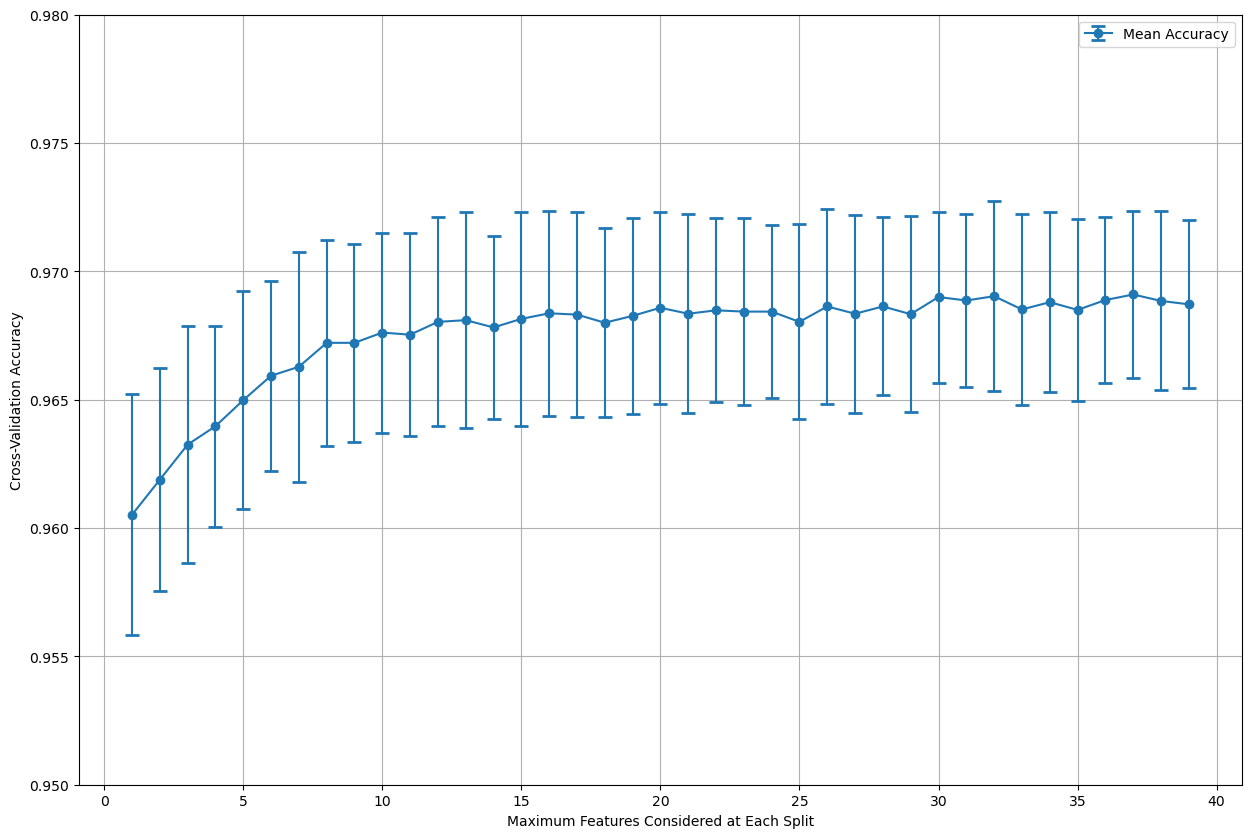

In [138]:
plt.figure(figsize=(15, 10))
plt.errorbar(max_features, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Maximum Features Considered at Each Split')
plt.ylabel('Cross-Validation Accuracy')
# plt.xticks(tree_depths[:-1])
plt.yticks(np.arange(0.95, 0.98, 0.005))
plt.grid(True)
plt.legend()
plt.savefig('max_features_1.png', dpi=200)
plt.show()

In [29]:
rf1 = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features=20,
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)
rf1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=20, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [30]:
y_pred = rf1.predict(X_test)
print(f'The Accuracy obtained on the test data of MNIST: {accuracy_score(y_test, y_pred)}')

The Accuracy obtained on the test data of MNIST: 0.9712


# 2. CIFAR-10

In [63]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [64]:
n_train = len(x_train)
n_test = len(x_test)
X_train = x_train.reshape((n_train, -1))
X_test = x_test.reshape((n_test, -1))

In [65]:
y_test = y_test.flatten()
y_train = y_train.flatten()

In [66]:
X_train.shape

(50000, 3072)

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

KeyboardInterrupt: 

In [30]:
y_pred = dt.predict(X_test)
np.mean(y_pred==y_test)

0.2698

In [31]:
dt.get_depth()

44

In [139]:
if not os.path.exists('ds2_tree_depth_cv.joblib'):
    param_grid = {
        'max_depth': list(np.arange(1, 40, 2)) + [None] # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        criterion='entropy',
        max_features='sqrt',
        n_jobs=6
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds2_tree_depth_cv.joblib')

else:
    grid_search = joblib.load('ds2_tree_depth_cv.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [140]:
cv_results[['param_max_depth', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_depth,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.15974,0.004342,0.1586,0.1618,0.1648,0.1582,0.1614,0.1546,0.1548,0.1554,0.1590,0.1688
1,3,0.28430,0.006623,0.2924,0.2894,0.2812,0.2752,0.2960,0.2798,0.2760,0.2802,0.2852,0.2876
2,5,0.32066,0.007924,0.3306,0.3296,0.3204,0.3082,0.3304,0.3162,0.3078,0.3182,0.3224,0.3228
3,7,0.36164,0.008951,0.3760,0.3728,0.3626,0.3508,0.3710,0.3546,0.3474,0.3582,0.3612,0.3618
4,9,0.39964,0.007143,0.4036,0.4062,0.3966,0.3962,0.4124,0.3968,0.3840,0.3972,0.4022,0.4012


In [141]:
tree_depths = cv_results['param_max_depth'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

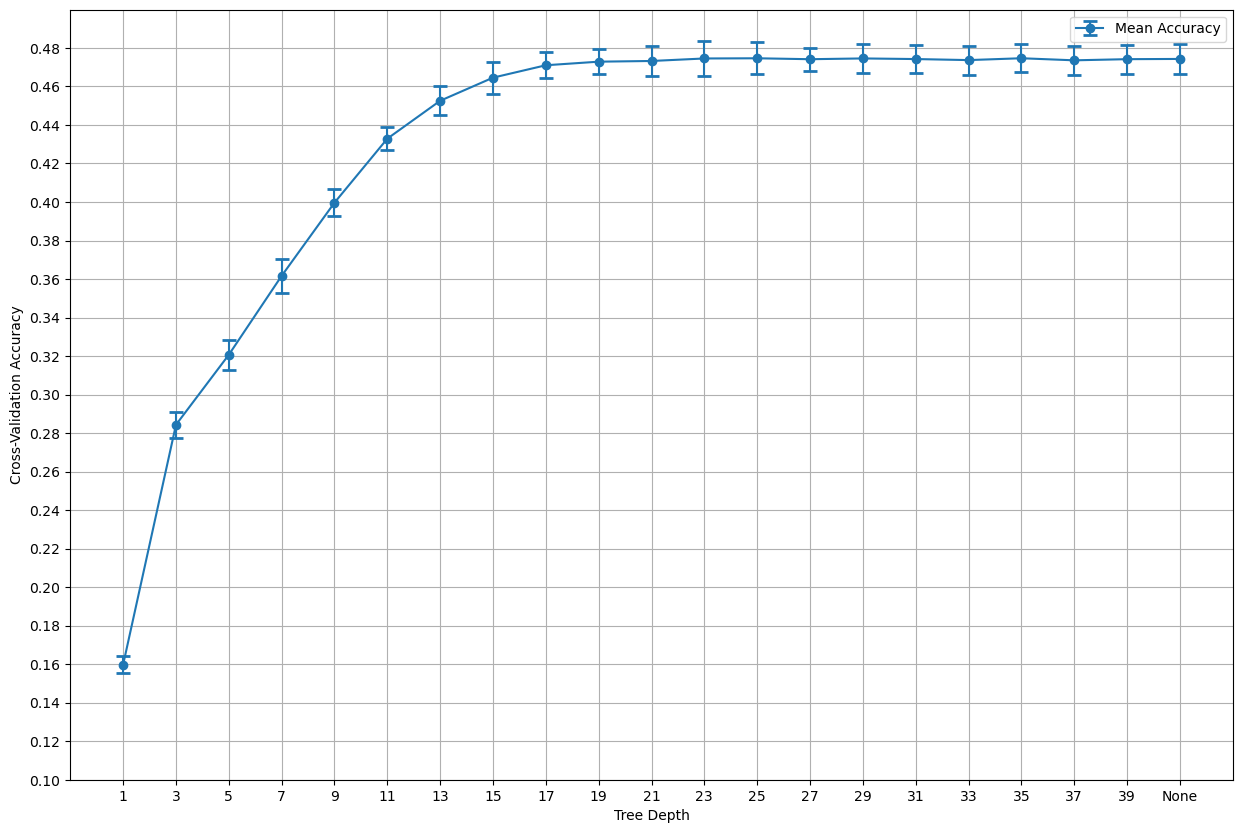

In [142]:
plt.figure(figsize=(15, 10))
tree_depths[-1] = 41
plt.errorbar(tree_depths, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation Accuracy')
#plt.title('Cross-Validation Accuracy against Tree Depth')
plt.xticks(tree_depths, tree_depths[:-1]+['None'])
plt.yticks(np.arange(0.1, 0.5, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('depth2.png', dpi=200)
plt.show()

In [34]:
len(std_scores)

21

In [143]:
def run_fold(max_depth, train_index, test_index, X_train, y_train, fold_idx):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    rf = RandomForestClassifier(
        random_state=42,
        criterion='entropy',
        max_features='sqrt',
        max_depth=max_depth,
        n_estimators=1000,
        warm_start=False
    )
    rf.fit(Xtrain, ytrain)
    predictions = np.zeros((len(ytest), 10))

    accuracy_scores_fold = np.zeros(1000)
    for i, estimator in enumerate(rf.estimators_):

        tree_pred = estimator.predict(Xtest)
        for idx, pred in enumerate(tree_pred):
            predictions[idx, int(pred)] += 1

        ypred = np.argmax(predictions, axis=1)
        accuracy_scores_fold[i] = accuracy_score(ytest, ypred)
    
    return accuracy_scores_fold

if not os.path.exists('ds2_depthnum_cv_parallel.joblib'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    param_grid = {
        'max_depth': list(np.arange(10, 21, 5)) + [None],
    }

    accuracy_scores = np.zeros((len(param_grid['max_depth']), 1000))

    for j, max_depth in enumerate(param_grid['max_depth']):

        print('Processing max depth', max_depth)

        results = Parallel(n_jobs=6)(
            delayed(run_fold)(max_depth, train_index, test_index, X_train, y_train, fold_idx)
            for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train))
        )

        for fold_result in results:
            accuracy_scores[j, :] += fold_result

    accuracy_scores /= kf.get_n_splits()
    joblib.dump(accuracy_scores, 'ds2_depthnum_cv_parallel.joblib')

else:
    accuracy_scores = joblib.load('ds2_depthnum_cv_parallel.joblib')

In [144]:
param_grid = {
        'max_depth': list(np.arange(10, 21, 5)) + [None],
    }

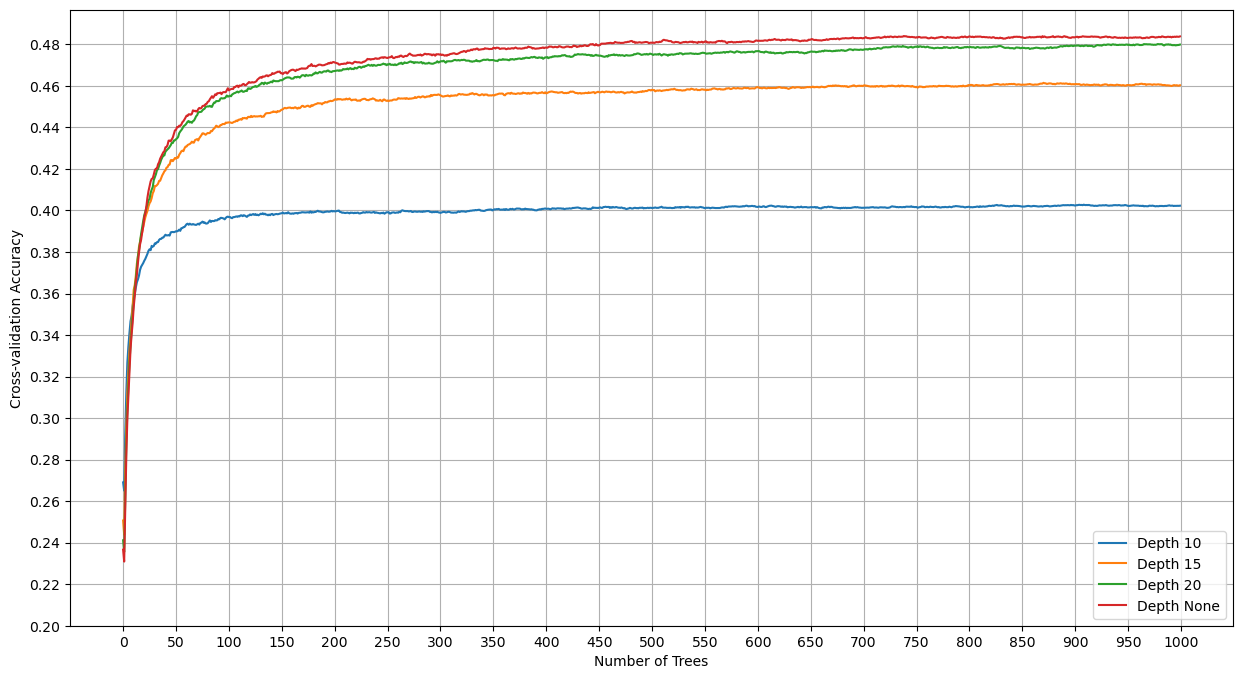

In [145]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][i]}')
    plt.xticks(np.arange(0, 1001, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.yticks(np.arange(0.2, 0.5, 0.02))
plt.grid()
plt.savefig('depth_iterations2.png', dpi=200)
plt.show()

From the plot above we see that as the maximum depth of the tree increase the cross-validation accuracy also increases. Futhermore, we see that as the number of decision trees increase the number cv accuracy also increases. Thus a tree with no max depth restriction and and more trees results in the best cross accuracy. We see that after 750 trees adding more trees do not increase the cross validation accuracy significantly.

In [146]:
if not os.path.exists('ds2_max_features.joblib'):
    param_grid = {
        'max_features': np.arange(1, 60, 2) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=750, 
        random_state=42, 
        criterion='entropy',
        n_jobs=6,
        max_depth=None
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds2_max_features.joblib')

else:
    grid_search = joblib.load('ds2_max_features.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [147]:
cv_results[['param_max_features', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_features,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.45210,0.008326,0.4624,0.4544,0.4580,0.4380,0.4596,0.4592,0.4412,0.4454,0.4452,0.4576
1,3,0.46296,0.008095,0.4774,0.4594,0.4648,0.4506,0.4764,0.4624,0.4534,0.4626,0.4612,0.4614
2,5,0.46656,0.008857,0.4854,0.4650,0.4702,0.4564,0.4728,0.4728,0.4532,0.4600,0.4632,0.4666
3,7,0.46972,0.007671,0.4826,0.4726,0.4710,0.4568,0.4790,0.4726,0.4584,0.4656,0.4676,0.4710
4,9,0.47324,0.008129,0.4830,0.4718,0.4784,0.4578,0.4824,0.4794,0.4636,0.4652,0.4732,0.4776


In [148]:
max_features = cv_results['param_max_features'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

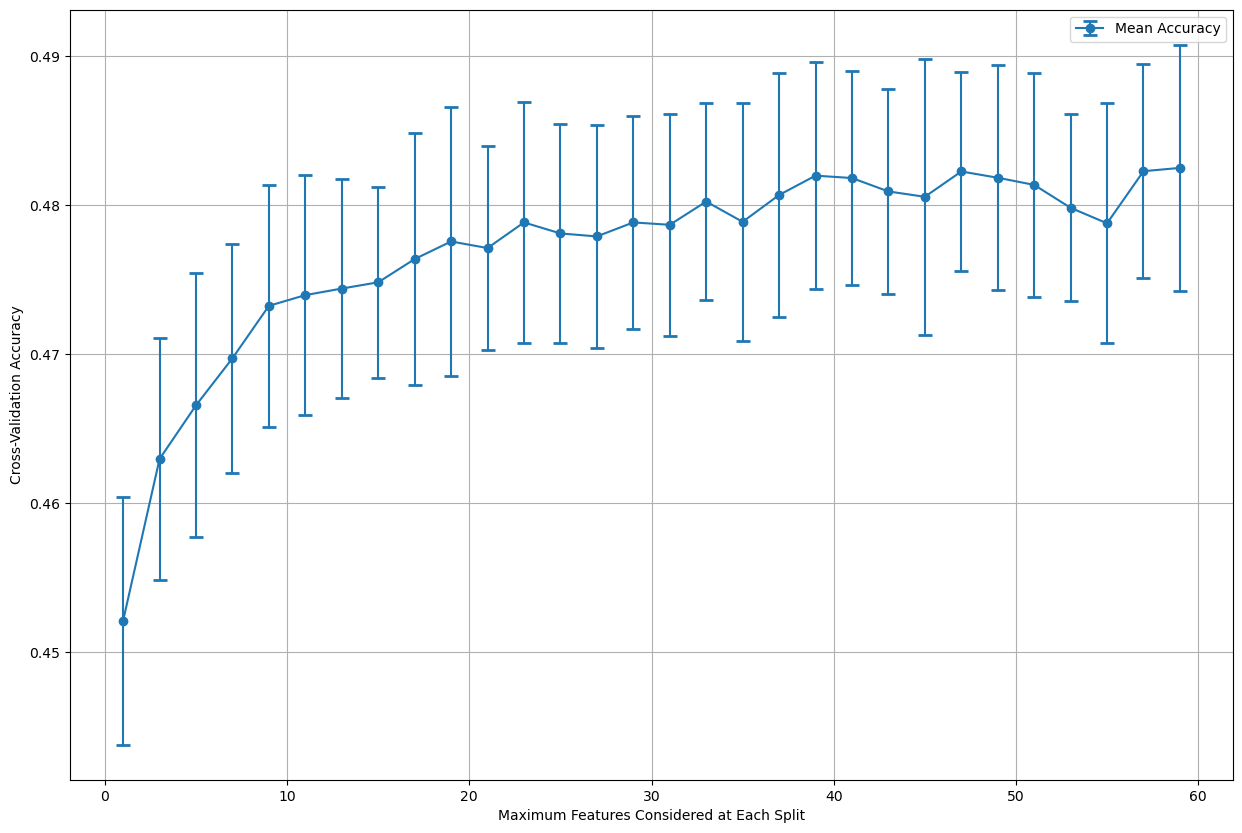

In [149]:
plt.figure(figsize=(15, 10))
plt.errorbar(max_features, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Maximum Features Considered at Each Split')
plt.ylabel('Cross-Validation Accuracy')
# plt.xticks(tree_depths[:-1])
#plt.yticks(np.arange(0.95, 0.98, 0.005))
plt.grid(True)
plt.legend()
plt.savefig('max_features2.png', dpi=200)
plt.show()

In [78]:
rf2 = RandomForestClassifier(
    n_estimators=750,
    max_depth=None,
    max_features=40,
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=40, n_estimators=750,
                       n_jobs=-1, random_state=42)

In [79]:
y_pred = rf2.predict(X_test)
print(f'The Accuracy obtained on the test data of CIFAR10: {accuracy_score(y_test, y_pred)}')

The Accuracy obtained on the test data of CIFAR10: 0.4898


# 3. Iris

In [150]:
from sklearn.datasets import load_iris

iris = load_iris()

# Create a DataFrame
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

In [151]:
X = iris_df.drop('target', axis=1).values
y = iris_df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
X_train.shape

(120, 4)

In [153]:
for _ in np.unique(y_train):
    print(sum(_==y_train))

40
41
39


In [154]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [155]:
y_pred = dt.predict(X_test)
np.mean(y_pred==y_test)

1.0

In [156]:
dt.get_depth()

6

In [157]:
if not os.path.exists('ds3_tree_depth_cv.joblib'):
    param_grid = {
        'max_depth': list(np.arange(1, 5, 1)) + [None] # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=200, 
        random_state=42, 
        criterion='entropy',
        max_features='sqrt',
        n_jobs=6
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds3_tree_depth_cv.joblib')

else:
    grid_search = joblib.load('ds3_tree_depth_cv.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [158]:
cv_results[['param_max_depth', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_depth,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.791667,0.107044,0.666667,1.0,0.75,0.75,0.666667,0.833333,0.833333,0.666667,0.916667,0.833333
1,2,0.933333,0.097183,0.916667,1.0,1.00,1.00,0.666667,0.916667,1.000000,1.000000,0.916667,0.916667
2,3,0.941667,0.098953,0.916667,1.0,1.00,1.00,0.666667,0.916667,1.000000,1.000000,1.000000,0.916667
3,4,0.933333,0.104083,0.916667,1.0,1.00,1.00,0.666667,0.833333,1.000000,1.000000,1.000000,0.916667
4,None,0.925000,0.101721,0.916667,1.0,1.00,1.00,0.666667,0.833333,1.000000,0.916667,1.000000,0.916667


In [159]:
tree_depths = cv_results['param_max_depth'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

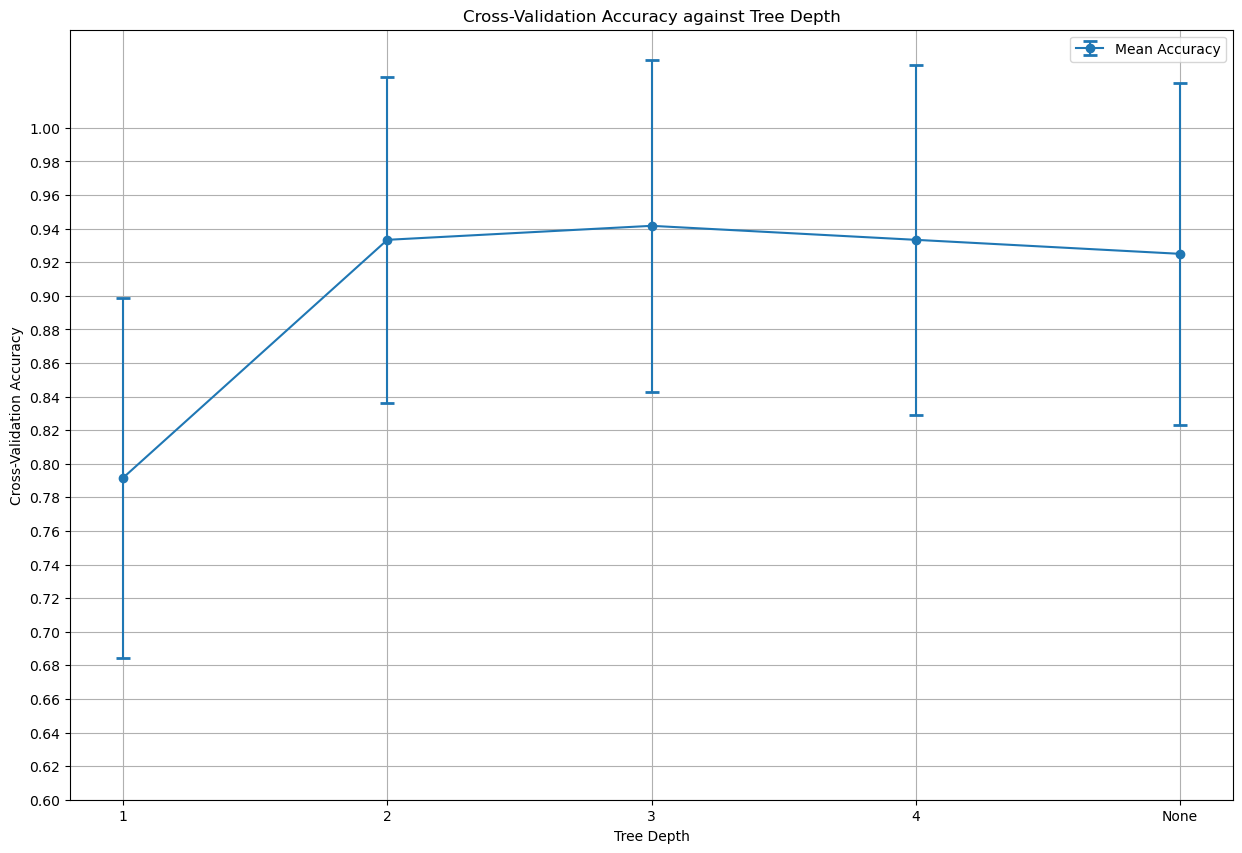

In [160]:
plt.figure(figsize=(15, 10))
tree_depths[-1] = 5
plt.errorbar(tree_depths, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy against Tree Depth')
plt.xticks(tree_depths, tree_depths[:-1]+['None'])
plt.yticks(np.arange(0.6, 1.01, 0.02))
plt.grid(True)
plt.legend()

plt.savefig('depth3.png', dpi=200)
plt.show()

In [161]:
def run_fold(max_depth, train_index, test_index, X_train, y_train, fold_idx):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    rf = RandomForestClassifier(
        random_state=42,
        criterion='entropy',
        max_features='sqrt',
        max_depth=max_depth,
        n_estimators=1000,
        warm_start=False
    )
    rf.fit(Xtrain, ytrain)
    predictions = np.zeros((len(ytest), 10))

    accuracy_scores_fold = np.zeros(1000)
    for i, estimator in enumerate(rf.estimators_):

        tree_pred = estimator.predict(Xtest)
        for idx, pred in enumerate(tree_pred):
            predictions[idx, int(pred)] += 1

        ypred = np.argmax(predictions, axis=1)
        accuracy_scores_fold[i] = accuracy_score(ytest, ypred)
    
    return accuracy_scores_fold

if not os.path.exists('ds3_depthnum_cv_parallel.joblib'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    param_grid = {
        'max_depth': list(np.arange(1, 5, 1)) + [None],
    }

    accuracy_scores = np.zeros((len(param_grid['max_depth']), 1000))

    for j, max_depth in enumerate(param_grid['max_depth']):

        print('Processing max depth', max_depth)

        results = Parallel(n_jobs=6)(
            delayed(run_fold)(max_depth, train_index, test_index, X_train, y_train, fold_idx)
            for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train))
        )

        for fold_result in results:
            accuracy_scores[j, :] += fold_result

    accuracy_scores /= kf.get_n_splits()
    joblib.dump(accuracy_scores, 'ds3_depthnum_cv_parallel.joblib')

else:
    accuracy_scores = joblib.load('ds3_depthnum_cv_parallel.joblib')

In [162]:
param_grid = {
        'max_depth': list(np.arange(1, 5, 1)) + [None],
    }

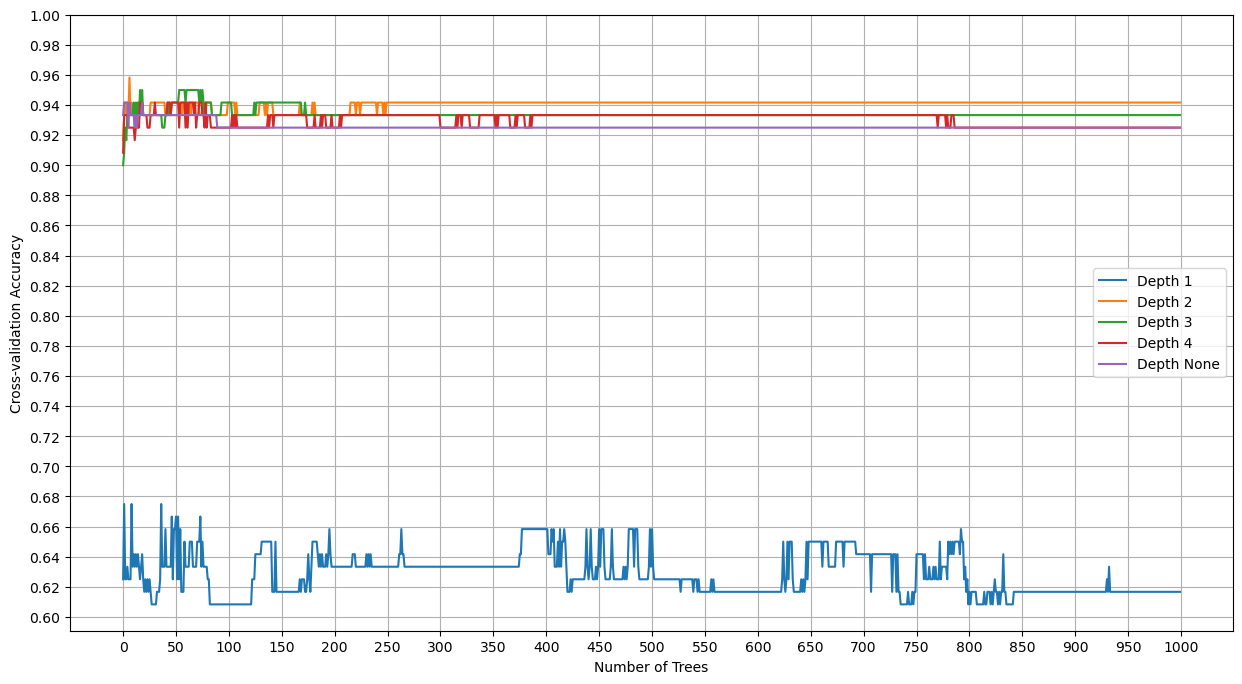

In [163]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][i]}')
    plt.xticks(np.arange(0, 1001, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation Accuracy')
plt.legend()
plt.yticks(np.arange(0.6, 1.01, 0.02))
plt.grid()
plt.savefig('depth_iterations3.png', dpi=200)
plt.show()

In [164]:
if not os.path.exists('ds3_max_features.joblib'):
    param_grid = {
        'max_features': np.arange(1, 5, 1) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        criterion='entropy',
        n_jobs=6,
        max_depth=2
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='accuracy',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds3_max_features.joblib')

else:
    grid_search = joblib.load('ds3_max_features.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [165]:
cv_results[['param_max_features', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_features,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.925000,0.101721,0.916667,1.0,1.0,1.0,0.666667,0.833333,1.0,1.000000,0.916667,0.916667
1,2,0.925000,0.101721,0.916667,1.0,1.0,1.0,0.666667,0.833333,1.0,1.000000,0.916667,0.916667
2,3,0.925000,0.101721,0.916667,1.0,1.0,1.0,0.666667,0.833333,1.0,0.916667,1.000000,0.916667
3,4,0.916667,0.098601,0.916667,1.0,1.0,1.0,0.666667,0.833333,1.0,0.916667,0.916667,0.916667


In [166]:
max_features = cv_results['param_max_features'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

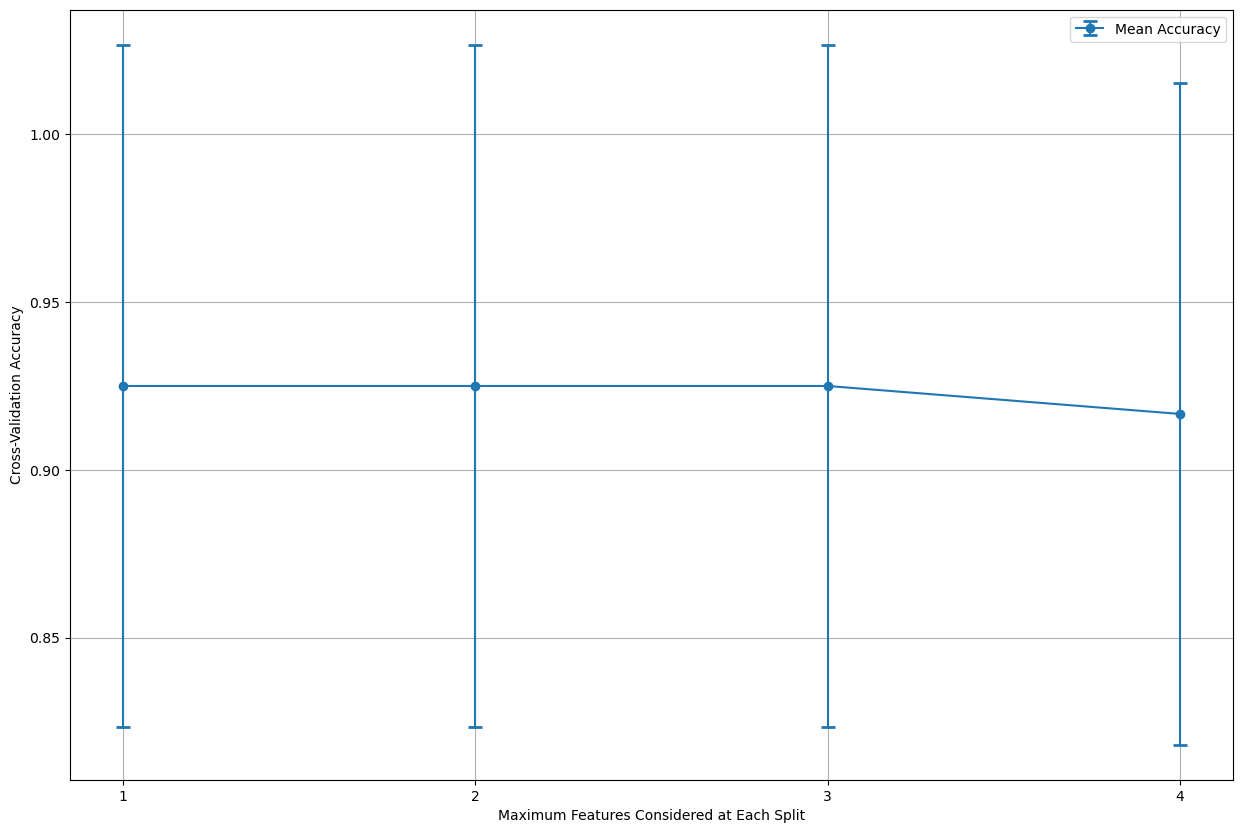

In [167]:
plt.figure(figsize=(15, 10))
plt.errorbar(max_features, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Maximum Features Considered at Each Split')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(tree_depths[:-1])
#plt.yticks(np.arange(0.95, 0.98, 0.005))
plt.grid(True)
plt.legend()
plt.savefig('maximum_features3.png', dpi=200)
plt.show()

In [61]:
rf3 = RandomForestClassifier(
    n_estimators=300,
    max_depth=2,
    max_features=1,
    criterion='entropy',
    random_state=42,
    n_jobs=-1
)
rf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, max_features=1,
                       n_estimators=300, n_jobs=-1, random_state=42)

In [62]:
y_pred = rf3.predict(X_test)
print(f'The Accuracy obtained on the test data of Iris: {accuracy_score(y_test, y_pred)}')

The Accuracy obtained on the test data of Iris: 1.0


In [63]:
len(y_test)

30

# 4. Bank Marketing

In [115]:
from ucimlrepo import fetch_ucirepo 
bank_marketing = fetch_ucirepo(id=222) 
  
X = bank_marketing.data.features
y = bank_marketing.data.targets
  
print(bank_marketing.metadata) 
print(bank_marketing.variables)

ConnectionError: Error connecting to server

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [66]:
X = pd.get_dummies(X).values

In [62]:
y = y.values == 'yes'

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [63]:
y = y.flatten()

In [64]:
X.shape, y.shape

((150, 4), (150,))

In [70]:
bank_marketing.data.targets.value_counts()

y  
no     39922
yes     5289
Name: count, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [72]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [73]:
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

0.4731800766283525

In [74]:
dt.get_depth()

43

In [168]:
if not os.path.exists('ds4_tree_depth_cv.joblib'):
    param_grid = {
        'max_depth': list(np.arange(1, 40, 2)) + [None] # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        criterion='entropy',
        max_features='sqrt',
        class_weight='balanced',
        n_jobs=6
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='f1',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds4_tree_depth_cv.joblib')

else:
    grid_search = joblib.load('ds4_tree_depth_cv.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [169]:
cv_results[['param_max_depth', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_depth,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.421709,0.021007,0.423993,0.476190,0.429397,0.394671,0.403200,0.429170,0.416118,0.407993,0.420032,0.416320
1,3,0.483139,0.014857,0.485691,0.500420,0.494606,0.457516,0.461044,0.491776,0.478081,0.482523,0.475120,0.504610
2,5,0.518141,0.016947,0.524563,0.529511,0.533784,0.489149,0.496689,0.524811,0.505458,0.520780,0.509151,0.547515
3,7,0.536967,0.011319,0.555274,0.546226,0.532326,0.524288,0.516611,0.537037,0.528870,0.541596,0.537190,0.550256
4,9,0.553560,0.009862,0.568142,0.551664,0.550877,0.537919,0.537543,0.548642,0.559787,0.561062,0.555172,0.564790


In [170]:
tree_depths = cv_results['param_max_depth'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

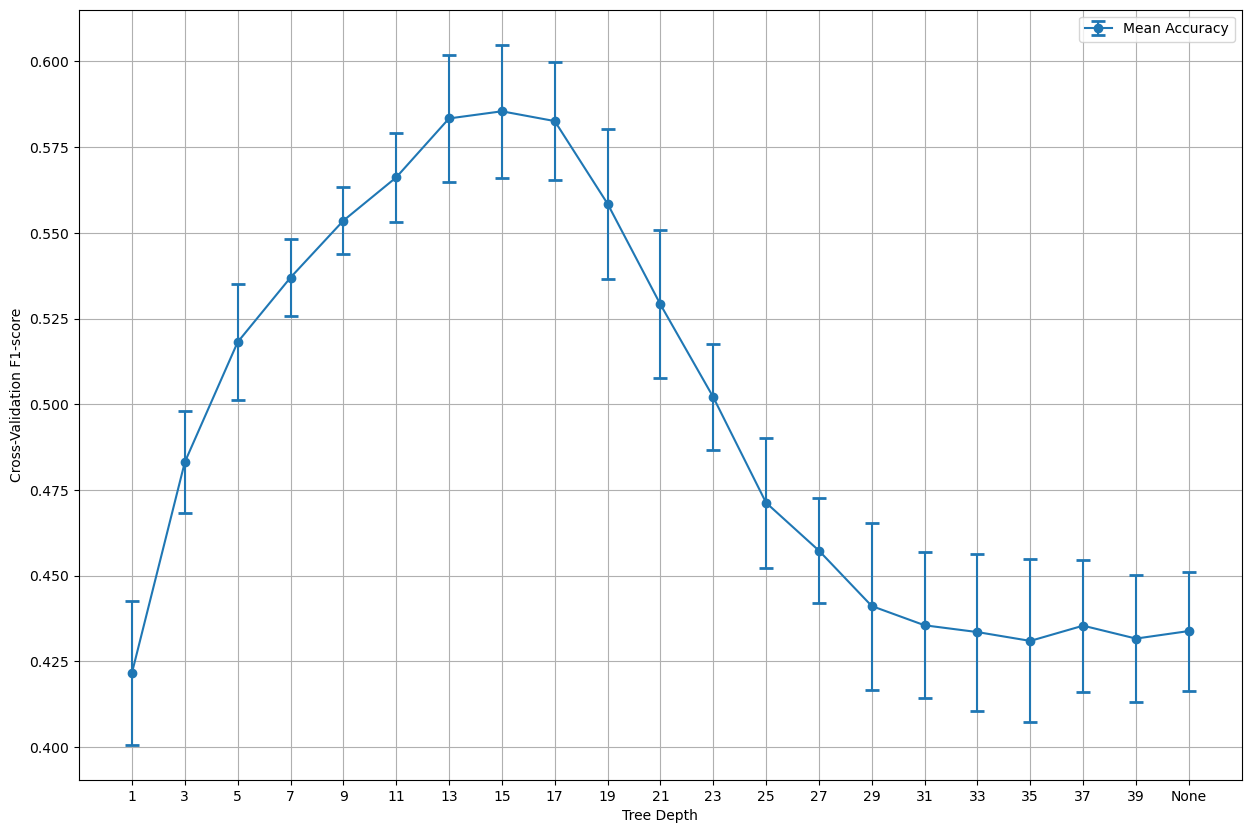

In [171]:
plt.figure(figsize=(15, 10))
tree_depths[-1] = 41
plt.errorbar(tree_depths, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation F1-score')
#plt.title('Cross-Validation F1-score against Tree Depth')
plt.xticks(tree_depths, tree_depths[:-1]+['None'])
#plt.yticks(np.arange(0.1, 0.5, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('depth_4.png', dpi=200)

plt.show()

In [172]:
def run_fold(max_depth, train_index, test_index, X_train, y_train, fold_idx):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    rf = RandomForestClassifier(
        random_state=42,
        criterion='entropy',
        max_features='sqrt',
        max_depth=max_depth,
        n_estimators=1000,
        class_weight='balanced',
        warm_start=False
    )
    rf.fit(Xtrain, ytrain)
    predictions = np.zeros((len(ytest), 10))

    accuracy_scores_fold = np.zeros(1000)
    for i, estimator in enumerate(rf.estimators_):

        tree_pred = estimator.predict(Xtest)
        for idx, pred in enumerate(tree_pred):
            predictions[idx, int(pred)] += 1

        ypred = np.argmax(predictions, axis=1)
        accuracy_scores_fold[i] = f1_score(ytest, ypred)
    
    return accuracy_scores_fold

if not os.path.exists('ds4_depthnum_cv_parallel.joblib'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    param_grid = {
        'max_depth': list(np.arange(5, 26, 5)) + [None],
    }

    accuracy_scores = np.zeros((len(param_grid['max_depth']), 1000))

    for j, max_depth in enumerate(param_grid['max_depth']):

        print('Processing max depth', max_depth)

        results = Parallel(n_jobs=6)(
            delayed(run_fold)(max_depth, train_index, test_index, X_train, y_train, fold_idx)
            for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train))
        )

        for fold_result in results:
            accuracy_scores[j, :] += fold_result

    accuracy_scores /= kf.get_n_splits()
    joblib.dump(accuracy_scores, 'ds4_depthnum_cv_parallel.joblib')

else:
    accuracy_scores = joblib.load('ds4_depthnum_cv_parallel.joblib')

In [173]:
param_grid = {
        'max_depth': list(np.arange(5, 26, 5)) + [None],
    }

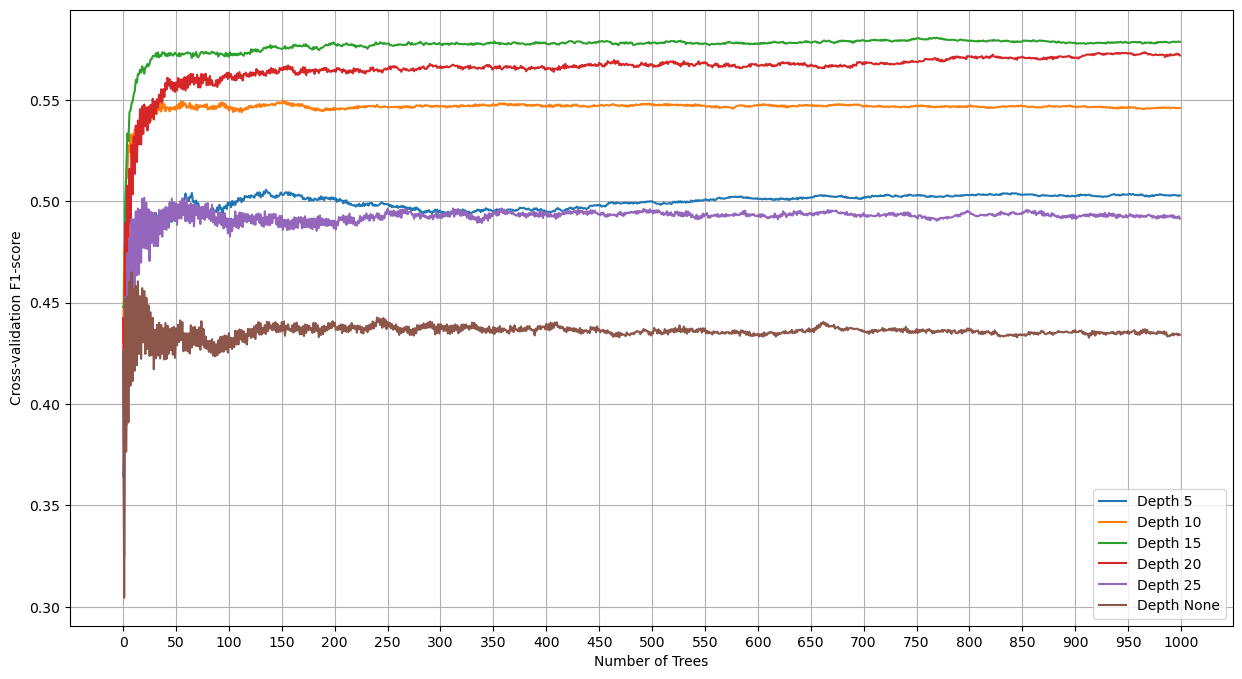

In [174]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][i]}')
    plt.xticks(np.arange(0, 1001, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation F1-score')
plt.legend()
#plt.yticks(np.arange(0.2, 0.5, 0.02))
plt.grid()
plt.savefig('depth_iteration_4.png', dpi=200)
plt.show()

In [175]:
if not os.path.exists('ds4_max_features.joblib'):
    param_grid = {
        'max_features': np.arange(1, 20, 1) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        criterion='entropy',
        class_weight='balanced',
        n_jobs=8,
        max_depth=15
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='f1',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds4_max_features.joblib')

else:
    grid_search = joblib.load('ds4_max_features.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [176]:
cv_results[['param_max_features', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_features,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.535376,0.020289,0.533666,0.553244,0.551122,0.487148,0.518779,0.551020,0.541296,0.549068,0.518797,0.549618
1,2,0.548312,0.017852,0.556992,0.557377,0.562278,0.506540,0.528428,0.564165,0.552147,0.545673,0.541766,0.567757
2,3,0.568946,0.022020,0.591166,0.559378,0.590650,0.524027,0.535519,0.566820,0.579008,0.572727,0.582192,0.587968
3,4,0.576708,0.016626,0.593857,0.566667,0.588629,0.541806,0.554140,0.573714,0.589714,0.580357,0.589831,0.588369
4,5,0.582095,0.016640,0.602492,0.565170,0.588496,0.556291,0.564756,0.570115,0.600000,0.603315,0.593088,0.577227


In [177]:
max_features = cv_results['param_max_features'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

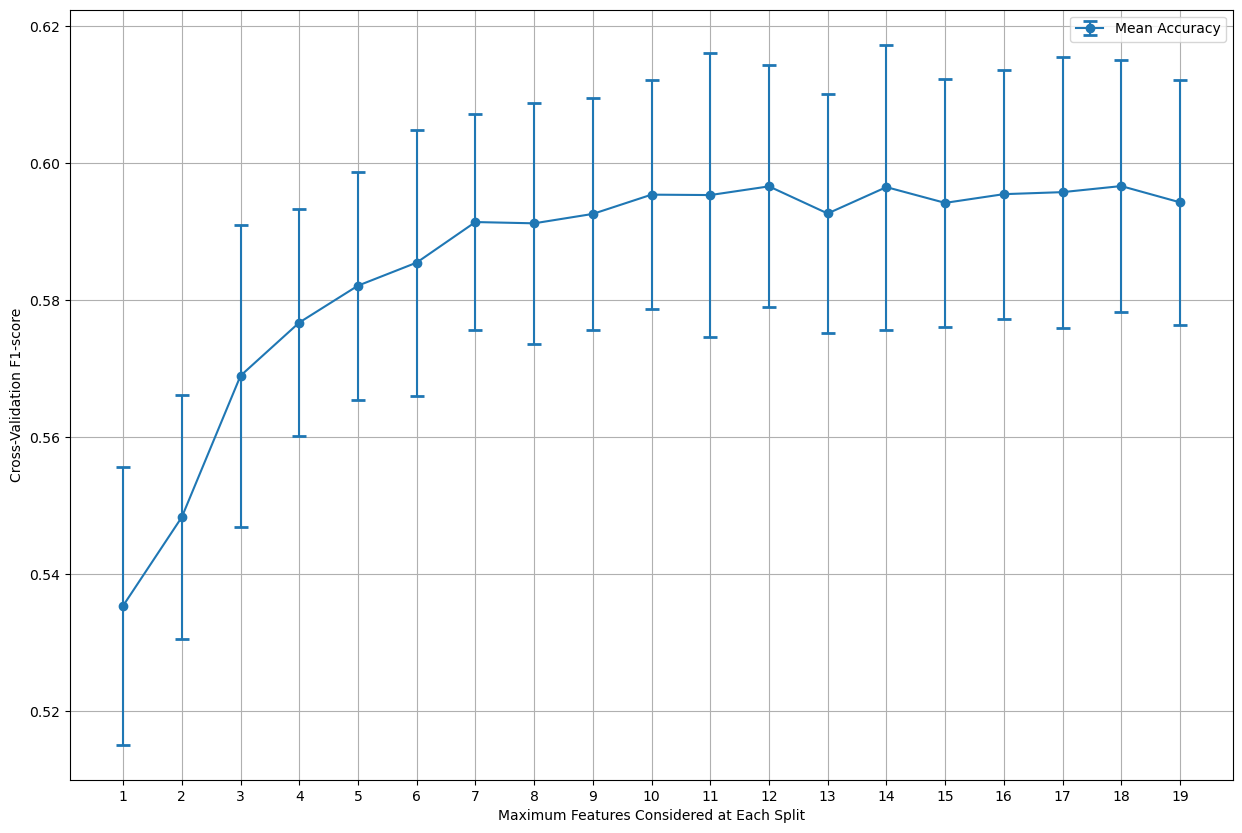

In [178]:
plt.figure(figsize=(15, 10))
plt.errorbar(max_features, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Maximum Features Considered at Each Split')
plt.ylabel('Cross-Validation F1-score')
plt.xticks(np.arange(1, 20, 1))
#plt.yticks(np.arange(0.95, 0.98, 0.005))
plt.grid(True)
plt.legend()
plt.savefig('max_features_4.png', dpi=200)
plt.show()

In [263]:
rf4 = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    max_features=10,
    criterion='entropy',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf4.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features=10, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [265]:
y_pred = rf4.predict(X_test)
print(f'The Accuracy obtained on the test data of Bank Marketing: {f1_score(y_test, y_pred)}')

The Accuracy obtained on the test data of Bank Marketing: 0.5983479607640682


# 5. Breast Cancer

In [68]:
from sklearn.datasets import load_breast_cancer


cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [69]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [70]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [71]:
cancer_df.isna().sum().sum()

0

In [72]:
cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [73]:
X = cancer_df.drop('target', axis=1).values
y = cancer_df['target'].values

In [74]:
X.shape

(569, 30)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [77]:
f1_score(y_test, y_pred)

0.9333333333333333

In [78]:
dt.get_depth()

7

In [179]:
if not os.path.exists('ds5_tree_depth_cv.joblib'):
    param_grid = {
        'max_depth': list(np.arange(1, 6, 1)) + [None] # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=200, 
        random_state=42, 
        criterion='entropy',
        max_features='sqrt',
        class_weight='balanced',
        n_jobs=6
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='f1',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds5_tree_depth_cv.joblib')

else:
    grid_search = joblib.load('ds5_tree_depth_cv.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [180]:
cv_results[['param_max_depth', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_depth,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.935436,0.023479,0.916667,0.943396,0.897959,0.92,0.936170,0.960000,0.961538,0.901961,0.958333,0.958333
1,2,0.951717,0.018636,0.960000,0.961538,0.920000,0.96,0.936170,0.960000,0.961538,0.920000,0.979592,0.958333
2,3,0.956135,0.017500,0.938776,0.961538,0.920000,0.96,0.979592,0.980392,0.961538,0.941176,0.960000,0.958333
3,4,0.950582,0.018553,0.920000,0.961538,0.941176,0.96,0.960000,0.980392,0.961538,0.941176,0.960000,0.920000
4,5,0.962273,0.022522,0.960000,0.980392,0.941176,0.96,0.979592,0.980392,1.000000,0.941176,0.960000,0.920000


In [181]:
tree_depths = cv_results['param_max_depth'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

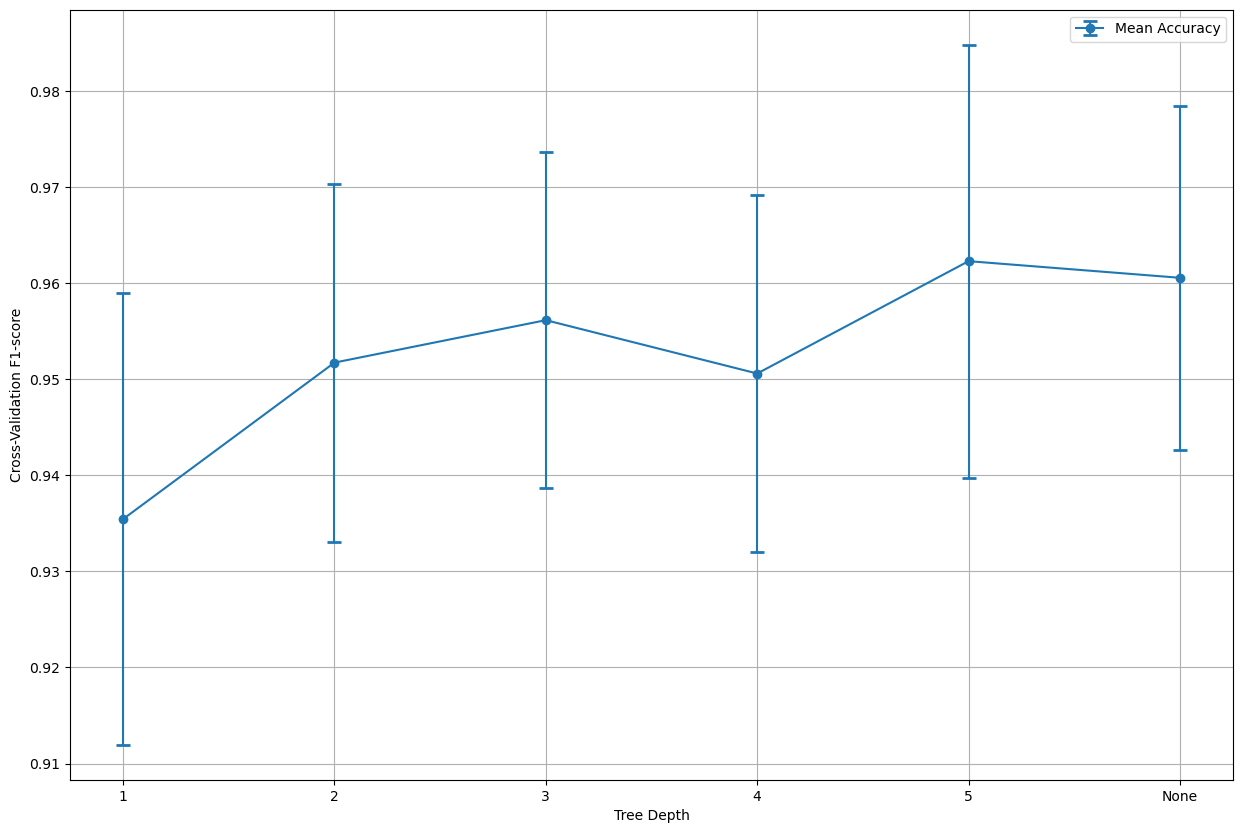

In [182]:
plt.figure(figsize=(15, 10))
tree_depths[-1] = 6
plt.errorbar(tree_depths, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validation F1-score')
#plt.title('Cross-Validation Accuracy against F1-score')
plt.xticks(tree_depths, tree_depths[:-1]+['None'])
#plt.yticks(np.arange(0.6, 1.01, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('depth_5.png', dpi=200)
plt.show()

In [183]:
def run_fold(max_depth, train_index, test_index, X_train, y_train, fold_idx):
    Xtrain, Xtest = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    rf = RandomForestClassifier(
        random_state=42,
        criterion='entropy',
        max_features='sqrt',
        max_depth=max_depth,
        class_weight='balanced',
        n_estimators=1000,
        warm_start=False
    )
    rf.fit(Xtrain, ytrain)
    predictions = np.zeros((len(ytest), 10))

    accuracy_scores_fold = np.zeros(1000)
    for i, estimator in enumerate(rf.estimators_):

        tree_pred = estimator.predict(Xtest)
        for idx, pred in enumerate(tree_pred):
            predictions[idx, int(pred)] += 1

        ypred = np.argmax(predictions, axis=1)
        accuracy_scores_fold[i] = f1_score(ytest, ypred)
    
    return accuracy_scores_fold

if not os.path.exists('ds5_depthnum_cv_parallel.joblib'):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    param_grid = {
        'max_depth': list(np.arange(1, 6, 1)) + [None],
    }

    accuracy_scores = np.zeros((len(param_grid['max_depth']), 1000))

    for j, max_depth in enumerate(param_grid['max_depth']):

        print('Processing max depth', max_depth)

        results = Parallel(n_jobs=6)(
            delayed(run_fold)(max_depth, train_index, test_index, X_train, y_train, fold_idx)
            for fold_idx, (train_index, test_index) in enumerate(kf.split(X_train))
        )

        for fold_result in results:
            accuracy_scores[j, :] += fold_result

    accuracy_scores /= kf.get_n_splits()
    joblib.dump(accuracy_scores, 'ds5_depthnum_cv_parallel.joblib')

else:
    accuracy_scores = joblib.load('ds5_depthnum_cv_parallel.joblib')

In [184]:
param_grid = {
        'max_depth': list(np.arange(1, 6, 1)) + [None],
    }

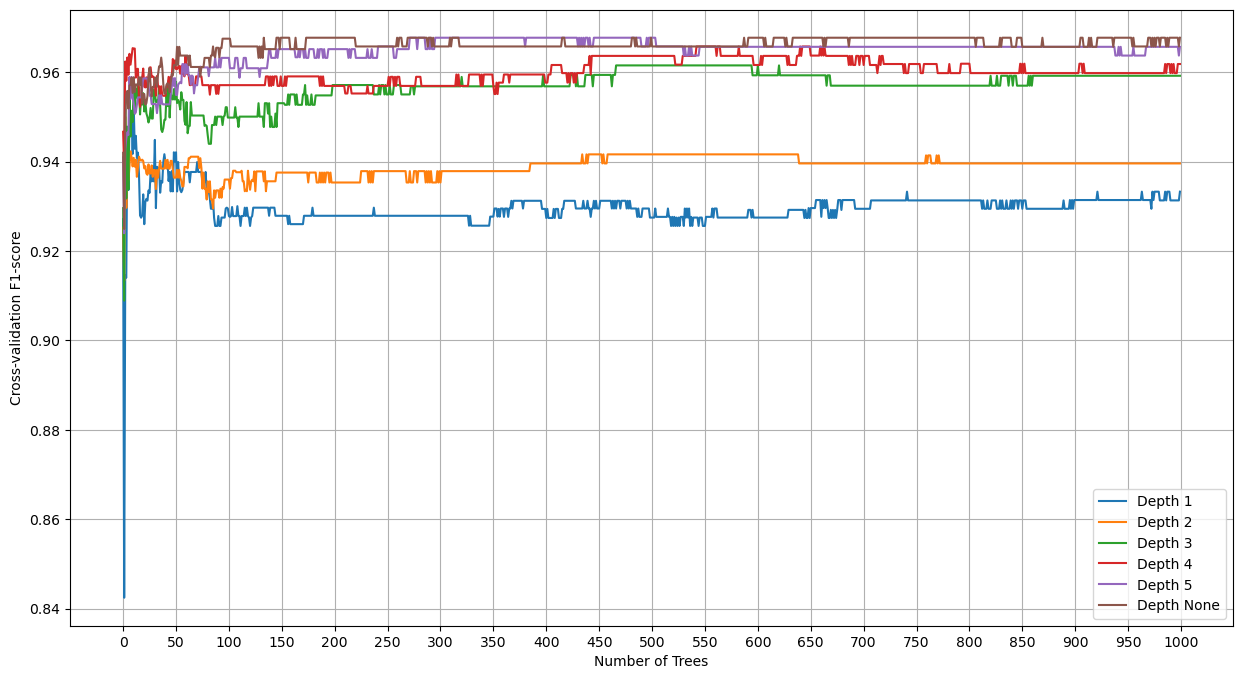

In [185]:
plt.figure(figsize=(15, 8))
for i, line in enumerate(accuracy_scores):
    plt.plot(line, label=f'Depth {param_grid['max_depth'][i]}')
    plt.xticks(np.arange(0, 1001, 50))
    plt.xlabel('Number of Trees')
    plt.ylabel('Cross-validation F1-score')
plt.legend()
#plt.yticks(np.arange(0.6, 1.01, 0.02))
plt.grid()
plt.savefig('depth_iteration_5.png', dpi=200)
plt.show()

In [186]:
if not os.path.exists('ds5_max_features.joblib'):
    param_grid = {
        'max_features': np.arange(1, 28, 2) # Tree depths to test
    }

    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        criterion='entropy',
        class_weight='balanced',
        n_jobs=-1,
        max_depth=None
    )

    grid_search = GridSearchCV(
        estimator=rf, 
        param_grid=param_grid, 
        cv=10, 
        scoring='f1',
        verbose=2
    )
    grid_search.fit(X_train, y_train)
    joblib.dump(grid_search, 'ds5_max_features.joblib')

else:
    grid_search = joblib.load('ds5_max_features.joblib')

cv_results = pd.DataFrame(grid_search.cv_results_)
fold_columns = [col for col in cv_results.columns if 'split' in col and 'test_score' in col]

In [187]:
cv_results[['param_max_features', 'mean_test_score', 'std_test_score'] + fold_columns].head()

,param_max_features,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score
0,1,0.954658,0.020267,0.920000,0.961538,0.960000,0.980392,0.980392,0.961538,0.961538,0.941176,0.96,0.92
1,3,0.960543,0.017899,0.941176,0.961538,0.960000,0.980392,0.960000,0.980392,0.980392,0.961538,0.96,0.92
2,5,0.958342,0.020971,0.938776,0.961538,0.941176,0.960000,0.960000,0.980392,1.000000,0.961538,0.96,0.92
3,7,0.962504,0.020804,0.980392,0.961538,0.941176,0.960000,0.960000,0.980392,1.000000,0.961538,0.96,0.92
4,9,0.964465,0.023185,1.000000,0.961538,0.941176,0.960000,0.960000,0.980392,1.000000,0.961538,0.96,0.92


In [188]:
max_features = cv_results['param_max_features'].tolist()
mean_scores = cv_results['mean_test_score'].tolist()
std_scores = cv_results['std_test_score'].tolist()

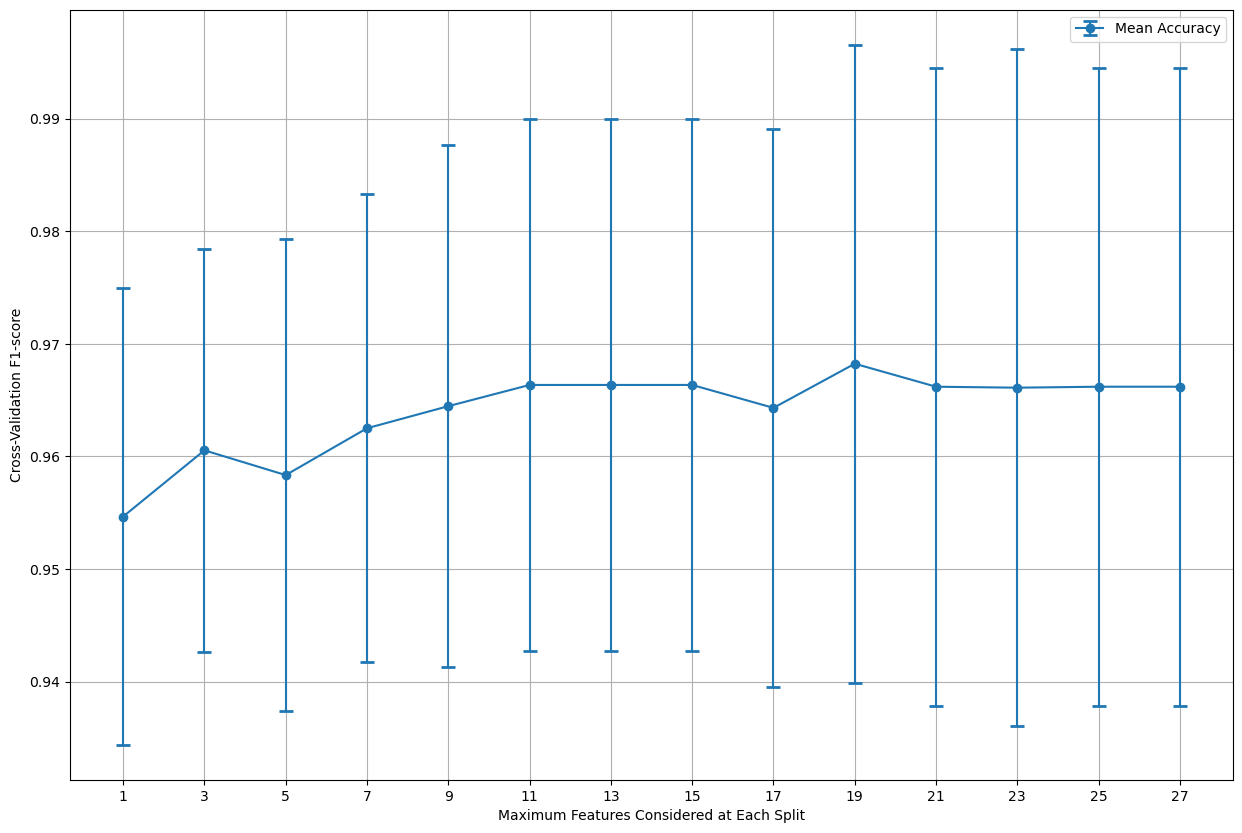

In [189]:
plt.figure(figsize=(15, 10))
plt.errorbar(max_features, mean_scores, yerr=std_scores, fmt='o-', capsize=5, capthick=2, label='Mean Accuracy')

plt.xlabel('Maximum Features Considered at Each Split')
plt.ylabel('Cross-Validation F1-score')
#plt.title('Cross-Validation F1-score against Tree Depth')
plt.xticks(max_features)
#plt.yticks(np.arange(0.95, 0.98, 0.005))
plt.grid(True)
plt.legend()

plt.savefig('max_features_5.png', dpi=200)
plt.show()

In [90]:
rf5 = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features=13,
    criterion='entropy',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf5.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features=13, n_estimators=300, n_jobs=-1,
                       random_state=42)

In [91]:
y_pred = rf5.predict(X_test)
print(f'The F1-score obtained on the test data of Breast Cancer: {f1_score(y_test, y_pred)}')

The F1-score obtained on the test data of Breast Cancer: 0.9771689497716894
